In [6]:
import pandas as pd
from pandas.tseries import converter
import numpy as np # for log transformation
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
## File for creating all graphs of interest regarding the September event.

## Import weather file
weather = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_weather0717-0618.csv', 
                 parse_dates=[[0,1]], index_col=0)
weather = weather.drop(columns=['threshold', 'const_err'])
weather = weather['2017-09-01':'2017-09-30']
weather_avg = weather.resample('D').mean()
air_temp = weather.temperature
air_temp_avg = air_temp.resample('D').mean()

In [3]:
## Import SST file
SST = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_sst0717-0618.csv',
                   parse_dates=[[0, 1]], index_col=0)
SST = SST.drop(columns=['s9_id', 'threshold', 'const_err'])
SST = SST[(SST.temperature < 31) & (SST.temperature > 20)]
SST = SST['2017-09-01':'2017-09-30'] 
SST = SST[SST.depth < 20].rename(columns={"temperature": "zone1"})
SST = SST.drop(columns=['depth'])
SST_avg = SST.zone1.resample('D').mean()

In [4]:
## Import chlorophyll
chl = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_chl0717-0618.csv', 
                 parse_dates=[[0,1]], index_col=0)
chl = chl.drop(columns=['turbidity_units', 'threshold', 'const_err'])
chl = chl[(chl.chlorophyll_concentration < 1.0) & (chl.chlorophyll_concentration > 0)]
chl = chl[:'2018-02-13'] # Remove bad data after February
chl = chl.drop(pd.Timestamp('2017-12-27 09:40:11')) 
chl_event = chl['2017-09-04':'2017-10-01'] # Data during Sept event
#chl_log = np.log(chl.chlorophyll_concentration) # for log transformation

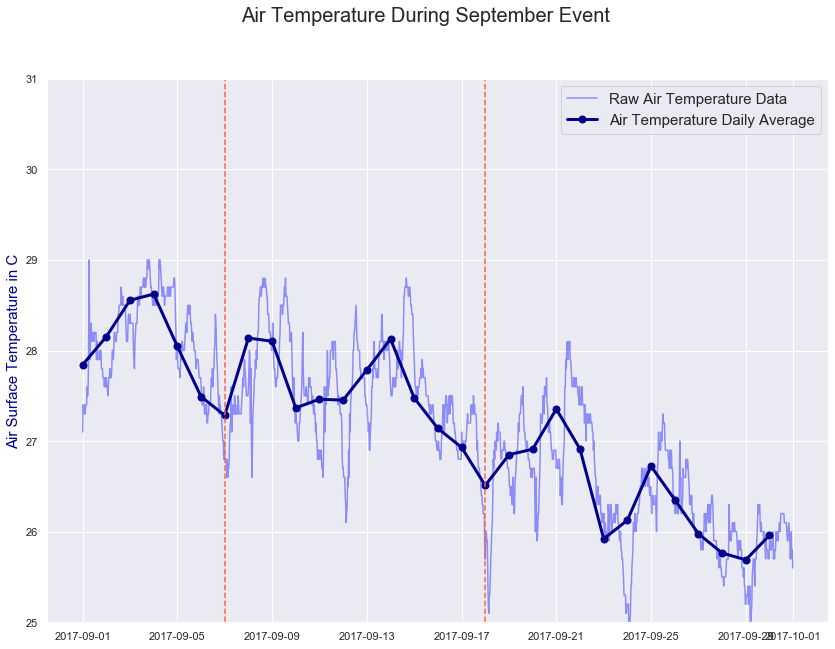

In [7]:
## Air Temperatures
air_plot = plt.figure(figsize=(14,10))
air_plot.suptitle('Air Temperature During September Event', fontsize=20)
air_fig = air_plot.add_subplot(111)

air_fig.plot(air_temp, color='blue', alpha=0.4)
air_fig.plot(air_temp_avg, color='darkblue', linewidth=3, 
             marker='o', markersize=7)
air_fig.set_ylabel('Air Surface Temperature in C', color='darkblue', fontsize=15)
air_fig.legend(['Raw Air Temperature Data', 'Air Temperature Daily Average'], fontsize=15, loc=0)
air_fig.set_ylim([25, 31])
air_fig.axvline('2017-09-07', color='tomato', linestyle='--')
air_fig.axvline('2017-09-18', color='tomato', linestyle='--')

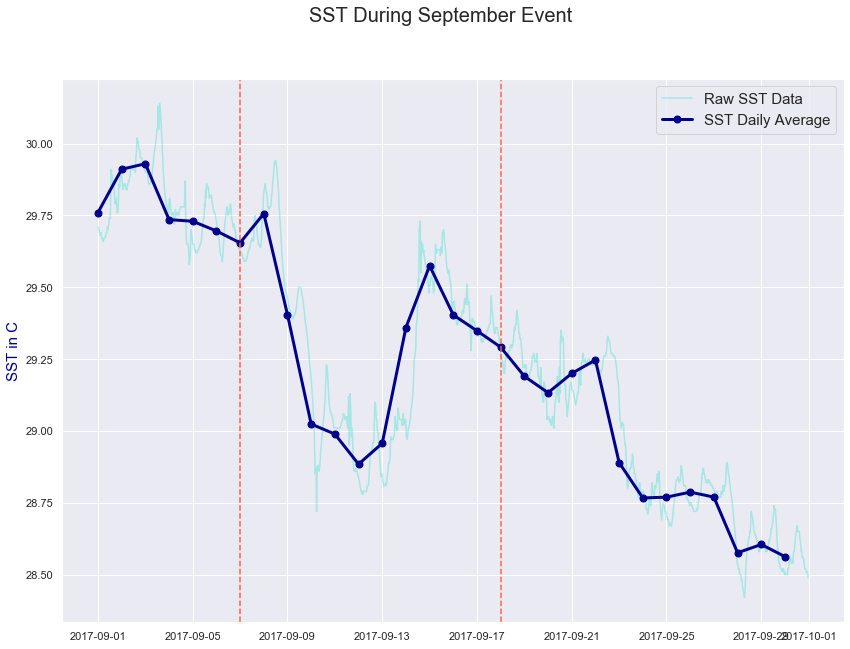

In [8]:
## SST
SST_plot = plt.figure(figsize=(14,10))
SST_plot.suptitle('SST During September Event', fontsize=20)
SST_fig = SST_plot.add_subplot(111)

SST_fig.plot(SST, color='turquoise', alpha=0.4)
SST_fig.plot(SST_avg, color='darkblue', linewidth=3, 
             marker='o', markersize=7)
SST_fig.set_ylabel('SST in C', color='darkblue', fontsize=15)
SST_fig.legend(['Raw SST Data', 'SST Daily Average'], fontsize=15, loc=0)
SST_fig.axvline('2017-09-07', color='tomato', linestyle='--')
SST_fig.axvline('2017-09-18', color='tomato', linestyle='--')

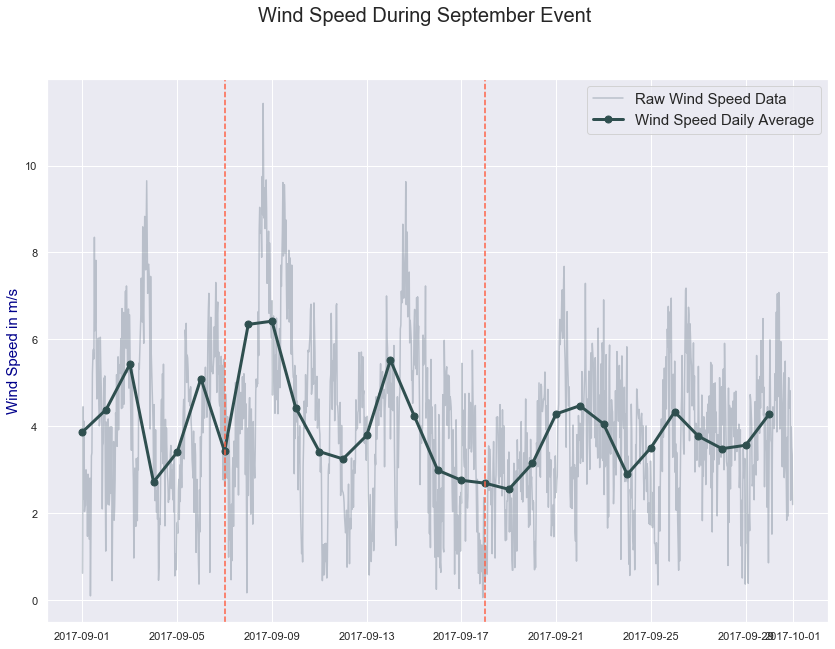

In [9]:
## Wind Speed
wind_speed= plt.figure(figsize=(14,10))
wind_speed.suptitle('Wind Speed During September Event', fontsize=20)
wind_speed_fig = wind_speed.add_subplot(111)

wind_speed_fig.plot(weather.wind_speed, color='slategray', alpha=0.4)
wind_speed_fig.plot(weather_avg.wind_speed, color='darkslategray', linewidth=3, 
             marker='o', markersize=7)
wind_speed_fig.set_ylabel('Wind Speed in m/s', color='darkblue', fontsize=15)
wind_speed_fig.legend(['Raw Wind Speed Data', 'Wind Speed Daily Average'], fontsize=15, loc=0)
wind_speed_fig.axvline('2017-09-07', color='tomato', linestyle='--')
wind_speed_fig.axvline('2017-09-18', color='tomato', linestyle='--')

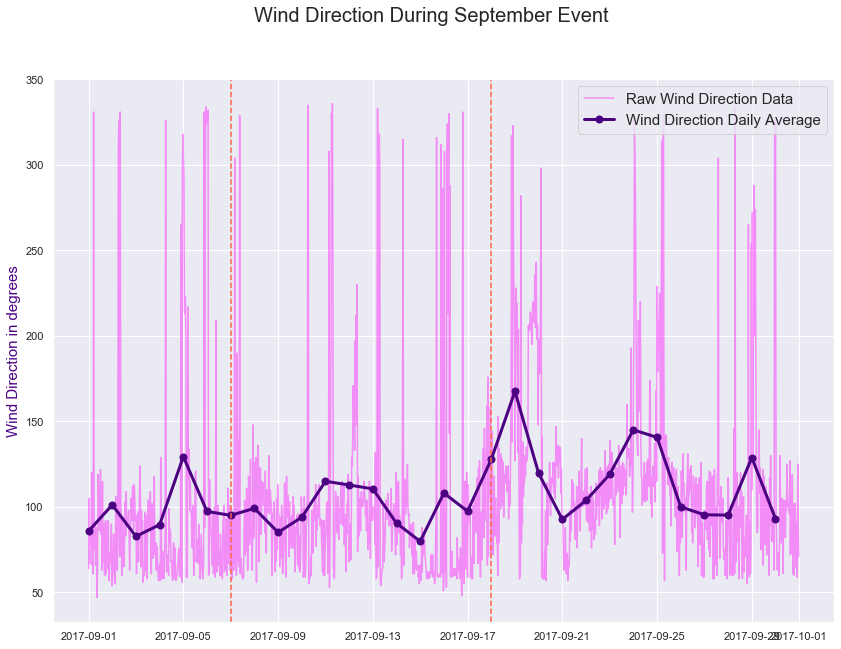

In [10]:
## Wind Direction
wind_direction= plt.figure(figsize=(14,10))
wind_direction.suptitle('Wind Direction During September Event', fontsize=20)
wind_direction_fig = wind_direction.add_subplot(111)

wind_direction_fig.plot(weather.wind_direction, color='magenta', alpha=0.4)
wind_direction_fig.plot(weather_avg.wind_direction, color='indigo', linewidth=3, 
             marker='o', markersize=7)
wind_direction_fig.set_ylabel('Wind Direction in degrees', color='indigo', 
                              fontsize=15)
wind_direction_fig.legend(['Raw Wind Direction Data', 'Wind Direction Daily Average'], 
                          fontsize=15, loc=1)
wind_direction_fig.axvline('2017-09-07', color='tomato', linestyle='--')
wind_direction_fig.axvline('2017-09-18', color='tomato', linestyle='--')

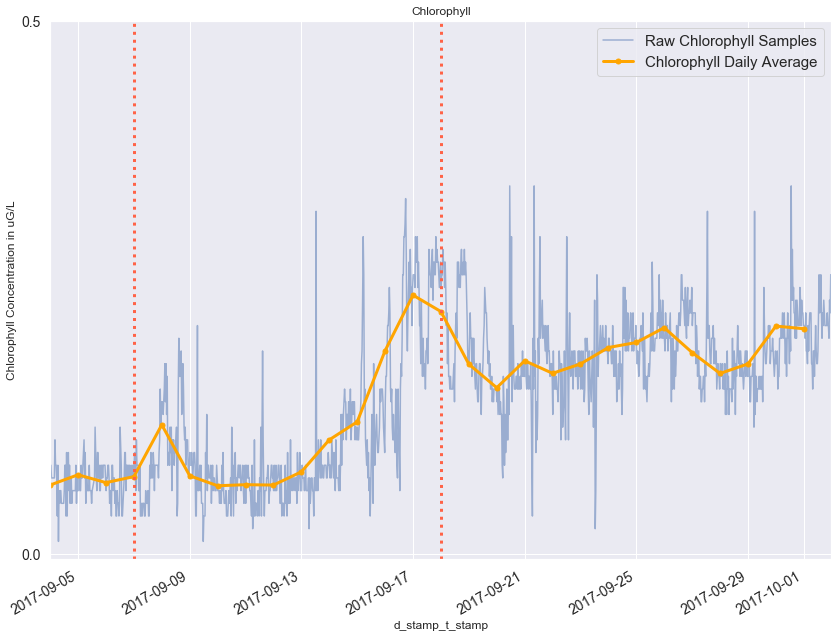

In [11]:
## Chlorophyll
chl_plot = chl_event.plot(title="Chlorophyll", figsize=(14,11), fontsize=14, alpha=0.5)
chl_plot.set_xlabel("Date"),chl_plot.set_ylabel("Chlorophyll Concentration in uG/L")
chl_avg = chl_event.chlorophyll_concentration.resample('D').mean()
chl_avg.plot(linewidth=3, color='orange', marker='o', markersize=5)
chl_plot.legend(["Raw Chlorophyll Samples", "Chlorophyll Daily Average", 
                  "Chlorophyll Minimum"], fontsize=15)
plt.yticks(np.arange(0, 1.0, 0.5))
chl_plot.axvline('2017-09-07', color='tomato', linestyle=':', linewidth=3)
chl_plot.axvline('2017-09-18', color='tomato', linestyle=':', linewidth=3)

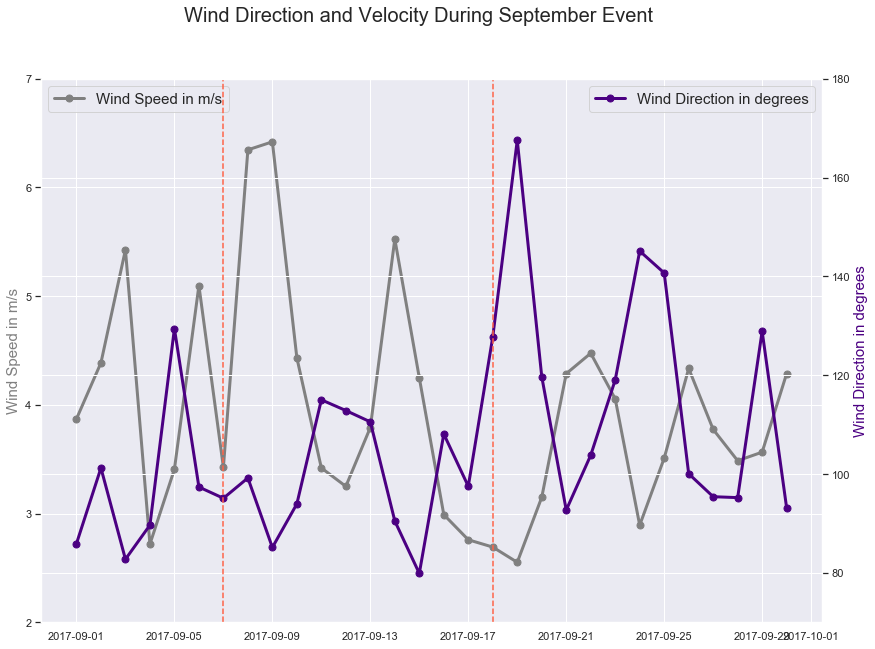

In [12]:
## Wind Speed and Wind Direction
winds = plt.figure(figsize=(14,10))
winds.suptitle('Wind Direction and Velocity During September Event', fontsize=20)
speed_fig = winds.add_subplot(111)

speed_fig.plot(weather_avg.wind_speed, color='gray', linewidth=3, 
             marker='o', markersize=7)
speed_fig.set_ylabel('Wind Speed in m/s', color='gray', fontsize=15)
speed_fig.legend(['Wind Speed in m/s'], fontsize=15, loc=2)
speed_fig.set_ylim([2, 7])

direction_fig = speed_fig.twinx()
direction_fig.plot(weather_avg.wind_direction, linewidth=3, color='indigo', 
                  marker='o', markersize=7)
direction_fig.set_ylabel('Wind Direction in degrees', color='indigo', fontsize=15)
direction_fig.legend(['Wind Direction in degrees'], fontsize=15)
direction_fig.set_ylim([70, 180])
direction_fig.axvline('2017-09-07', color='tomato', linestyle='--')
direction_fig.axvline('2017-09-18', color='tomato', linestyle='--')

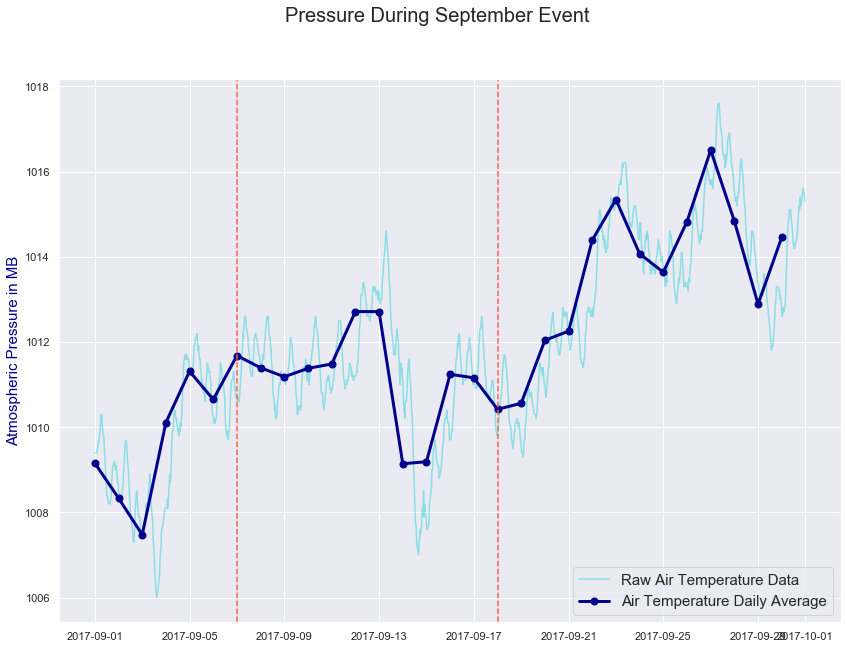

In [13]:
## Pressure
pressure = plt.figure(figsize=(14,10))
pressure.suptitle('Pressure During September Event', fontsize=20)
pressure_fig = pressure.add_subplot(111)

pressure_fig.plot(weather.pressure, color='darkturquoise', alpha=0.4)
pressure_fig.plot(weather_avg.pressure, color='darkblue', linewidth=3, 
             marker='o', markersize=7)
pressure_fig.set_ylabel('Atmospheric Pressure in MB', color='darkblue', fontsize=15)
pressure_fig.legend(['Raw Air Temperature Data', 'Air Temperature Daily Average'], 
                    fontsize=15, loc=0)
#pressure_fig.set_ylim([25, 31])
pressure_fig.axvline('2017-09-07', color='tomato', linestyle='--')
pressure_fig.axvline('2017-09-18', color='tomato', linestyle='--')

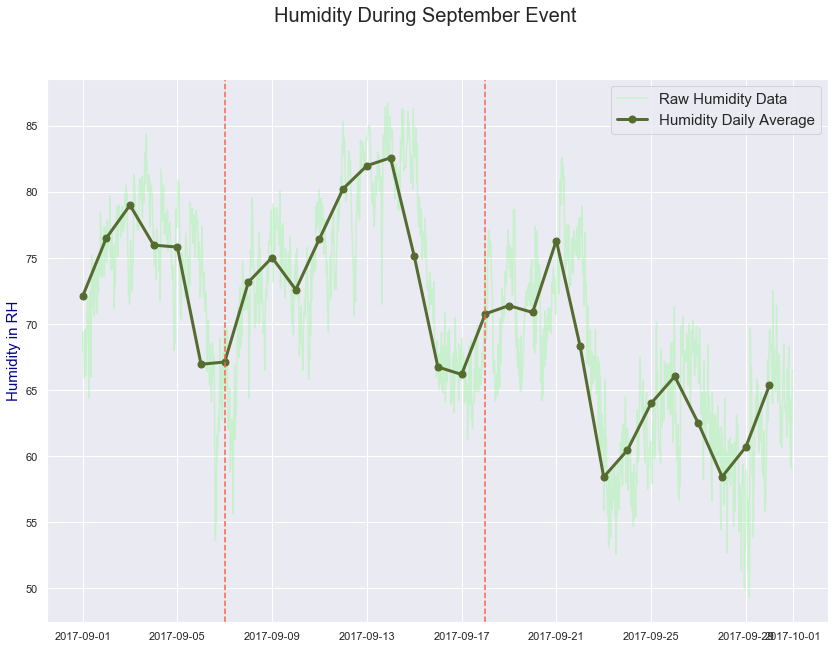

In [14]:
## Humidity
humidity = plt.figure(figsize=(14,10))
humidity.suptitle('Humidity During September Event', fontsize=20)
humidity_fig = humidity.add_subplot(111)

humidity_fig.plot(weather.humidity, color='palegreen', alpha=0.4)
humidity_fig.plot(weather_avg.humidity, color='darkolivegreen', linewidth=3, 
             marker='o', markersize=7)
humidity_fig.set_ylabel('Humidity in RH', color='darkblue', fontsize=15)
humidity_fig.legend(['Raw Humidity Data', 'Humidity Daily Average'], 
                    fontsize=15, loc=0)
#pressure_fig.set_ylim([25, 31])
humidity_fig.axvline('2017-09-07', color='tomato', linestyle='--')
humidity_fig.axvline('2017-09-18', color='tomato', linestyle='--')

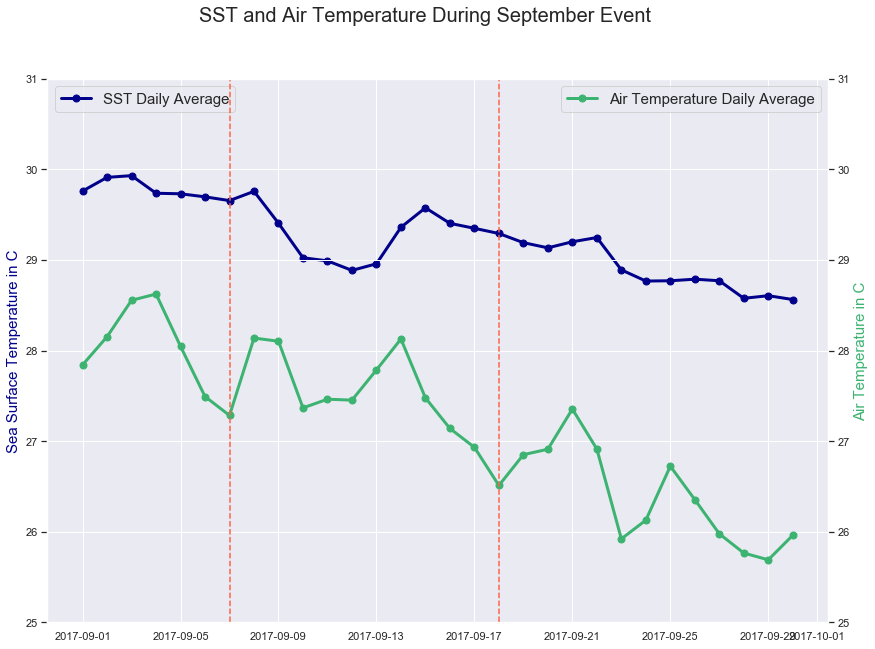

In [15]:
## Combed SST and Air Temperatures
temperatures = plt.figure(figsize=(14,10))
temperatures.suptitle('SST and Air Temperature During September Event', fontsize=20)
SST_fig = temperatures.add_subplot(111)

SST_fig.plot(SST_avg, color='darkblue', linewidth=3, 
             marker='o', markersize=7)
SST_fig.set_ylabel('Sea Surface Temperature in C', color='darkblue', fontsize=15)
SST_fig.legend(['SST Daily Average'], fontsize=15, loc=2)
SST_fig.set_ylim([25, 31])

air_temp_fig = SST_fig.twinx()
air_temp_fig.plot(air_temp_avg, linewidth=3, color='mediumseagreen', 
                  marker='o', markersize=7)
air_temp_fig.set_ylabel('Air Temperature in C', color='mediumseagreen', fontsize=15)
air_temp_fig.legend(['Air Temperature Daily Average'], fontsize=15)
air_temp_fig.set_ylim([25, 31])
air_temp_fig.axvline('2017-09-07', color='tomato', linestyle='--')
air_temp_fig.axvline('2017-09-18', color='tomato', linestyle='--')